##  Computer Vision Project 
This is a baseline Model 

In [7]:
import torch 
import torch.nn as nn
import torchvision
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data import DataLoader


In [29]:
import matplotlib.pyplot as plt

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f" The device Being used is:  {device}")

 The device Being used is:  cpu


In [9]:
print("Torch Version", torch.__version__)
print("TorchVision Version", torchvision.__version__)

Torch Version 2.7.0+cpu
TorchVision Version 0.22.0+cpu


In [ ]:
# Downloading training and Test dataset of FashionMNIST form torchvision.datasets
train_data = datasets.FashionMNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="../data",
    train=False,
    transform=ToTensor(),
    download=True

)

100.0%
100.0%
100.0%
100.0%


In [19]:
print(f"The training data size : {len(train_data)}")
print(f"The Testing  data size : {len(test_data)}")

The training data size : 60000
The Testing  data size : 10000


In [20]:
imgs, label = train_data[0]
imgs.shape

torch.Size([1, 28, 28])

In [25]:
# Shape of the datasets 
train_data.data.shape, train_data.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [26]:
# print the classes for the sataset 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
label, class_names[label]

(9, 'Ankle boot')

Text(0.5, 1.0, 'Ankle boot')

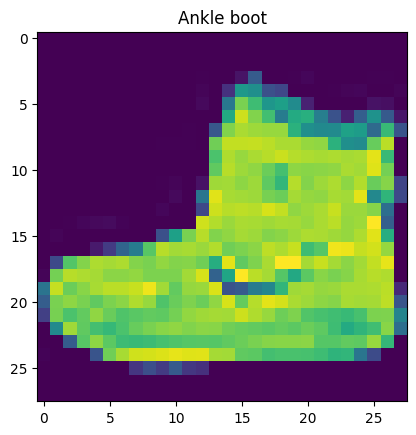

In [31]:
plt.imshow(imgs.squeeze())
plt.title(class_names[label])

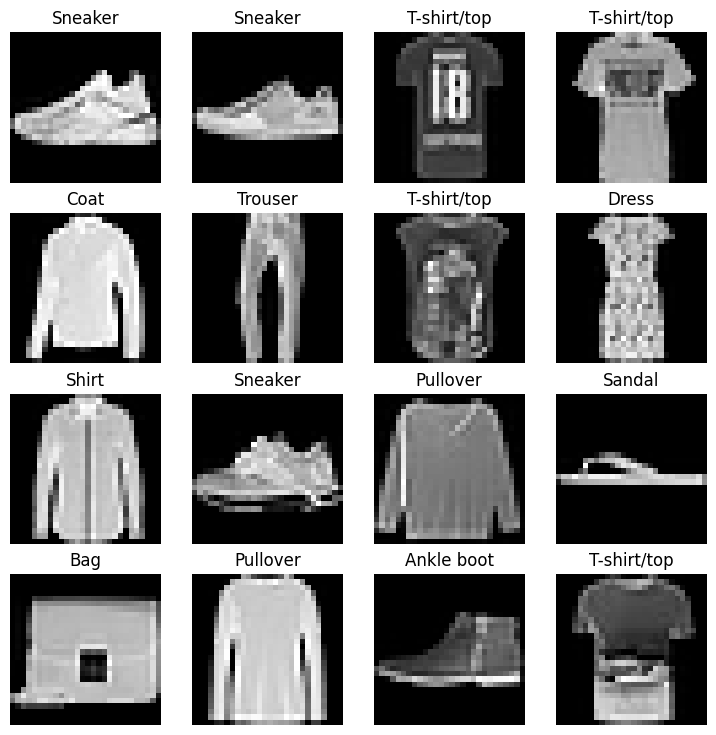

In [75]:
# Let Visualize some plots
rows, cols = 4, 4
fig = plt.figure(figsize=(9,9))
for item in range (1, rows*cols+1):
    randindx = int(torch.randint(0, len(train_data), size=[1]))
    img, labels = train_data[randindx] # type: ignore
    fig.add_subplot(rows, cols, item)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[labels])
    plt.axis(False)

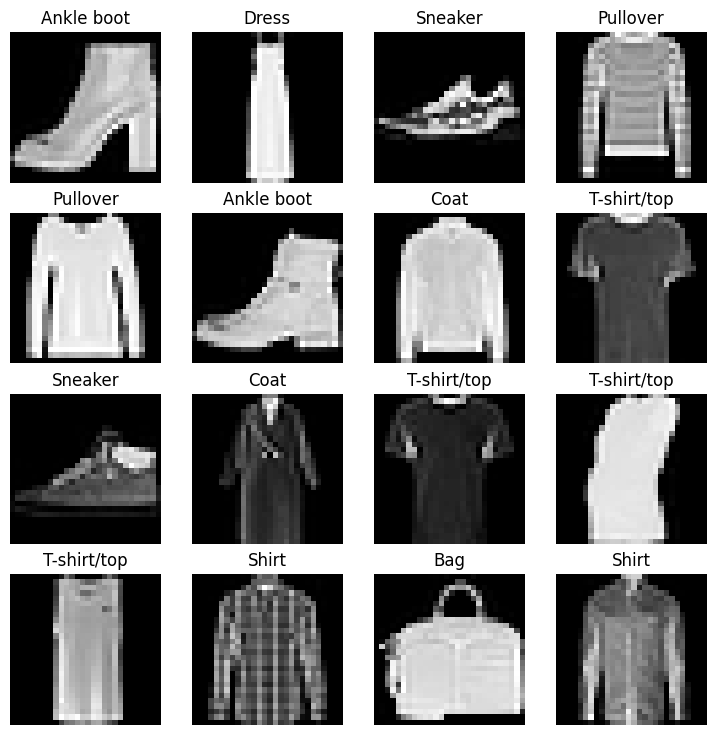

In [76]:
# Let Visualize some plots... a bit differnt approach (vectorized random sampling)

rows, cols = 4, 4
fig = plt.figure(figsize=(9, 9))
randindx = torch.randint(0, len(train_data), size=[rows * cols])

for idx, i in enumerate(randindx, start=1):
    im, l = train_data[int(i)]
    fig.add_subplot(rows, cols, idx)
    plt.imshow(im.squeeze(), cmap="gray")
    plt.title(class_names[l])
    plt.axis(False)


In [90]:
# adding DataLoaders... which turns datasets into iterable batchs

BATCH_SIZE = 32
train_data_loader = DataLoader(
    dataset=train_data,
    batch_size= BATCH_SIZE,
    shuffle=True
)

test_data_loader = DataLoader(
    dataset=test_data,
    batch_size= BATCH_SIZE,
    shuffle=False
)
train_data_loader,test_data_loader, len(train_data_loader)

(<torch.utils.data.dataloader.DataLoader at 0x1e24e02bd50>,
 1875)

In [84]:
train_data_loader_features, train_data_loader_target = next(iter(train_data_loader))
test_data_loader_features, test_data_loader_target = next(iter(test_data_loader))

train_data_loader_features.shape, train_data_loader_target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

1875

60000